# Welcome to Olympics Data Analysis 1896-2016 Rio Di Jenerio

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load Our Dataset
ath=pd.read_csv('athlete_events.csv')
region_df=pd.read_csv('noc_regions.csv')

In [223]:
ath.min()

ID                                          1
Name                          Jean Hauptmanns
Sex                                         F
Age                                      11.0
Height                                  127.0
Weight                                   28.0
Team                              30. Februar
NOC                                       AFG
Games                             1896 Summer
Year                                     1896
Season                                 Summer
City                              Albertville
Sport                             Aeronautics
Event           Aeronautics Mixed Aeronautics
Total Medals                              NaN
dtype: object

In [44]:
#Join the dataframes or Merge the dataframe

ath=ath.merge(region_df,on='NOC',how='left')

In [45]:
ath.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'],inplace=True)

In [46]:
#Shape of our merged Dataset
ath.shape

(124634, 19)

In [47]:
#Here there is a problem which is many of the column
#whose name is start with lower case so
#we have to convert that into upper case
ath.rename(columns={'region':'Region','notes':'Notes'},inplace=True)

In [48]:
#Let's see the statistical behaviour of our data
#by applying describe() function
#But this will us only analysis about numeric columns
ath.describe()

,ID,Age,Height,Weight,Year
count,124634.000000,121282.000000,102110.00000,101331.000000,124634.000000
mean,54363.256559,25.257375,174.76825,70.499033,1982.168766
std,38477.267803,5.987941,10.05985,14.905281,28.146116
min,1.000000,11.000000,127.00000,28.000000,1896.000000
25%,20326.250000,21.000000,168.00000,60.000000,1968.000000
50%,48102.000000,24.000000,175.00000,69.000000,1988.000000
75%,84618.750000,28.000000,182.00000,78.000000,2004.000000
max,135560.000000,84.000000,218.00000,214.000000,2016.000000


In [49]:
ath.isnull().sum()

# So here we have missing values in around 6 columns

ID             0
Name           0
Sex            0
Age         3352
Height     22524
Weight     23303
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     105707
Region       259
Notes     122297
Region       259
Notes     122297
dtype: int64

In [50]:
ath['Age'].unique().tolist() #You can see the nan values here

[24.0,
 23.0,
 34.0,
 21.0,
 25.0,
 27.0,
 31.0,
 33.0,
 18.0,
 26.0,
 22.0,
 30.0,
 32.0,
 28.0,
 54.0,
 20.0,
 17.0,
 43.0,
 47.0,
 29.0,
 41.0,
 45.0,
 49.0,
 53.0,
 57.0,
 nan,
 19.0,
 38.0,
 35.0,
 16.0,
 37.0,
 15.0,
 42.0,
 46.0,
 40.0,
 36.0,
 14.0,
 39.0,
 48.0,
 52.0,
 44.0,
 55.0,
 50.0,
 71.0,
 63.0,
 51.0,
 58.0,
 13.0,
 60.0,
 75.0,
 65.0,
 84.0,
 12.0,
 72.0,
 59.0,
 56.0,
 64.0,
 62.0,
 61.0,
 73.0,
 11.0,
 76.0,
 69.0,
 66.0,
 67.0,
 70.0,
 68.0,
 81.0]

In [51]:
#players from india
india_1=ath.query('Team == "India"')

In [52]:
india_1.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Region,Notes
452,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN,India,NaN
453,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN,India,NaN
813,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN,India,NaN
814,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,India,NaN
815,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN,India,NaN
816,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,India,NaN
817,512,Shiny Kurisingal Abraham-Wilson,F,27.0,167.0,53.0,India,IND,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN,India,NaN,India,NaN
818,512,Shiny Kurisingal Abraham-Wilson,F,31.0,167.0,53.0,India,IND,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN,India,NaN
1088,663,Sharath Kamal Achanta,M,22.0,186.0,85.0,India,IND,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,India,NaN
1089,663,Sharath Kamal Achanta,M,26.0,186.0,85.0,India,IND,2008 Summer,2008,Summer,Beijing,Table Tennis,Table Tennis Men's Singles,NaN,India,NaN,India,NaN


In [53]:
india_1.shape #So 1400 players are from india

(704, 19)

In [54]:
#Top countries participating
top_country=ath.Team.value_counts().sort_values(ascending=False).head(10)

In [55]:
top_country

United States    6877
France           4444
Great Britain    4443
Italy            3951
Canada           3756
Germany          3597
Australia        3338
Japan            3317
Sweden           3251
Hungary          2927
Name: Team, dtype: int64

Text(0.5, 1.0, 'Top Participation Nation')

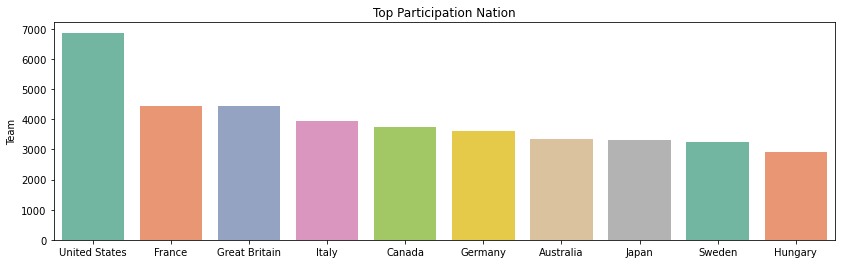

In [56]:
#let's make a bar graph of top 10 countries
plt.figure(figsize=(14,4))
sns.barplot(x=top_country.index,y=top_country,palette='Set2');
plt.title('Top Participation Nation')

In [57]:
##On the basis of Summer i want to filter out our data
ath_summer=ath[ath['Season']=='Summer']

In [58]:
#Top_10 Participating countries who is participated in summer 
ath_10_Participated=ath_summer.Team.value_counts().sort_values(ascending=False).head(10)

<AxesSubplot:title={'center':'Top_10 Participated Nation In Summer'}, ylabel='Team'>

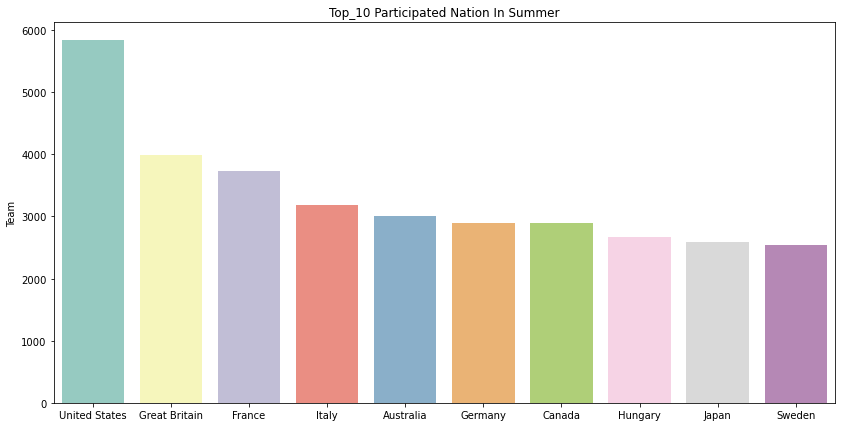

In [61]:
#let's make a bar graph of top 10 countries participated in Summer
plt.figure(figsize=(14,7))
plt.title('Top_10 Participated Nation In Summer')
sns.barplot(x=ath_10_Participated.index,y=ath_10_Participated,palette='Set3')

In [62]:
ath['Age'].fillna

<bound method Series.fillna of 0         24.0
1         23.0
2         24.0
3         34.0
4         21.0
          ... 
124629    25.0
124630    29.0
124631    29.0
124632    33.0
124633    36.0
Name: Age, Length: 124634, dtype: float64>

In [63]:

ath_age=ath[ath['Age']>21.0]

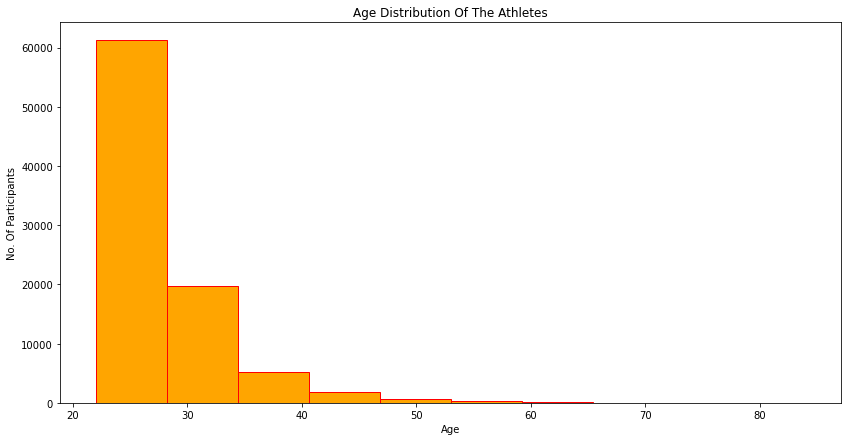

In [64]:
#Age Distribution Of the participants Whose Age>21yrs
plt.figure(figsize=(14,7))
plt.xlabel('Age')
plt.ylabel('No. Of Participants')
plt.title('Age Distribution Of The Athletes')
plt.hist(ath_age.Age,bins=(10), color='orange',edgecolor='red');


In [65]:
#On the basis of Winter i want to filter out our data
ath_winter=ath[ath['Season']=='Winter']

In [66]:
ath_winter.shape #In winter there were 48564 participated

(18998, 19)

In [67]:
#Top_10 Participating countries who is participated in Winter
ath_10_winter=ath_winter.Team.value_counts().sort_values(ascending=False).head(10)

In [68]:
ath_10_winter #These are the countries who were participated in winter

United States    1042
Norway            930
Canada            855
Italy             764
Austria           763
Japan             724
Sweden            718
France            713
Germany           696
Switzerland       631
Name: Team, dtype: int64

Text(0.5, 0, "Country's")

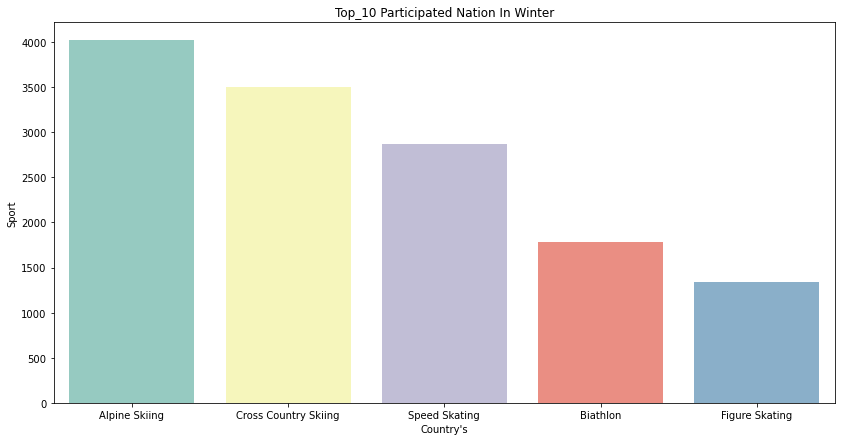

In [109]:
#let's make a bar graph of top 10 countries participated in Winter
plt.figure(figsize=(14,7))
plt.title('Top_10 Participated Nation In Winter')
sns.barplot(x=ath_10_winter.index,y=ath_10_winter,palette='Set3')
plt.xlabel("Country's")
           


In [110]:
#Summer Olympics Sports
ath_summer_sports=ath[ath['Season']=='Summer'].Sport.unique()

In [111]:
ath_10_summer=ath_summer.Sport.value_counts().sort_values(ascending=False).head()

Text(0.5, 0, 'Sports')

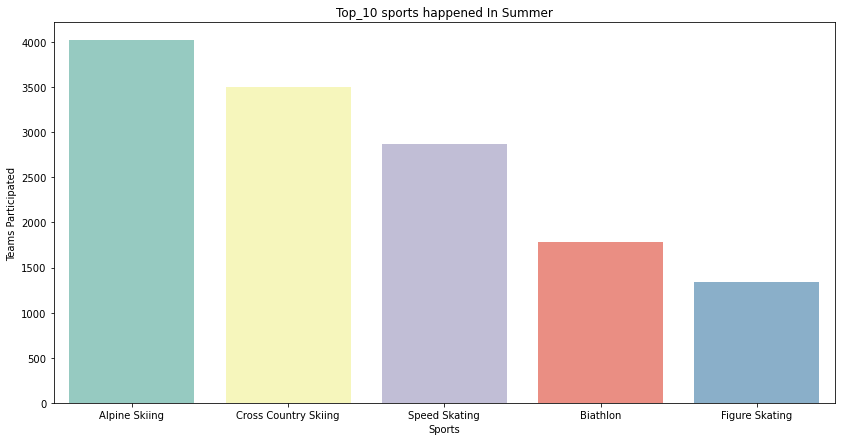

In [112]:
#let's make a bar graph of top 10 sports happened in summer
plt.figure(figsize=(14,7))
plt.title('Top_10 sports happened In Summer')
sns.barplot(x=ath_10_summer.index,y=ath_10_summer,palette='Set3')
plt.ylabel('Teams Participated')
plt.xlabel('Sports')

In [113]:
ath_winter=ath[ath['Season']=='Winter']

In [114]:
#Winter Olympics Sports
ath_winter_sports=ath[ath['Season']=='Winter'].Sport.unique()

In [115]:
ath_10_winter=ath_winter.Sport.value_counts().sort_values(ascending=False).head()

Text(0.5, 0, 'Sports')

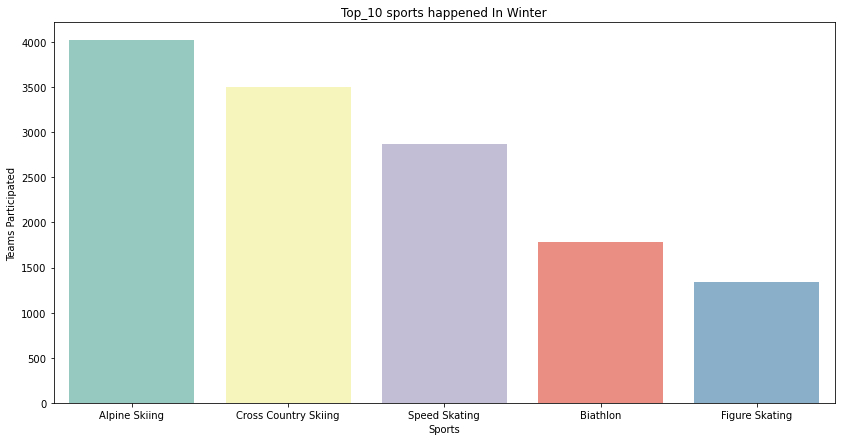

In [116]:
#let's make a bar graph of top 10 sports happened in summer
plt.figure(figsize=(14,7))
plt.title('Top_10 sports happened In Winter')
sns.barplot(x=ath_10_winter.index,y=ath_10_winter,palette='Set3')
plt.ylabel('Teams Participated')
plt.xlabel('Sports')

In [117]:
#Male and Female Participants
gender_counts=ath['Sex'].value_counts()
gender_counts

M    88949
F    35685
Name: Sex, dtype: int64

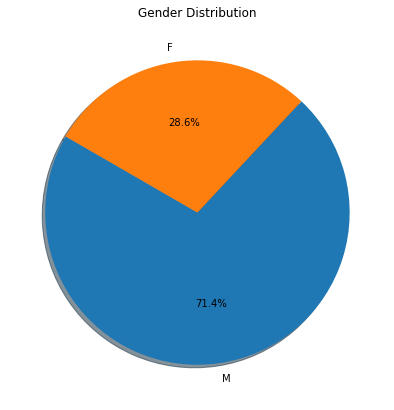

In [118]:
#pie plot for male and female athletes
plt.figure(figsize=(12,7))
plt.title('Gender Distribution')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=150,shadow=True);

In [119]:
ath['Medal'].value_counts()

Bronze    6559
Gold      6201
Silver    6167
Name: Medal, dtype: int64

In [127]:
#One hot encoding 
ath_medals=pd.concat([ath,pd.get_dummies(ath['Medal'])],axis=1)

In [128]:
#Total Medals
ath_medals['Total Medals']=ath_medals['Gold']+ath_medals['Silver']+ath_medals['Bronze']

In [148]:
#Total No. Of Female Athletes in each olympics incase of Summer 
female_ath=ath[(ath.Sex=='F') & (ath.Season=='Summer')][['Sex','Year']]
female_ath=female_ath.groupby('Year').count().reset_index()
female_ath.head()

,Year,Sex
0,1900,18
1,1904,9
2,1906,8
3,1908,18
4,1912,39


In [150]:
#Total No. Of Female Athletes in each olympics incase of Winter
female_ath=ath[(ath.Sex=='F') & (ath.Season=='Winter')][['Sex','Year']]
female_ath=female_ath.groupby('Year').count().reset_index()
female_ath.head()

,Year,Sex
0,1924,11
1,1928,16
2,1932,11
3,1936,41
4,1948,61


In [151]:
female_olymp=ath[(ath.Sex=='F') & (ath.Season=='Summer')]

In [153]:
import seaborn as sns

Text(0.5, 1.0, 'Women Participation Incase Of Summer')

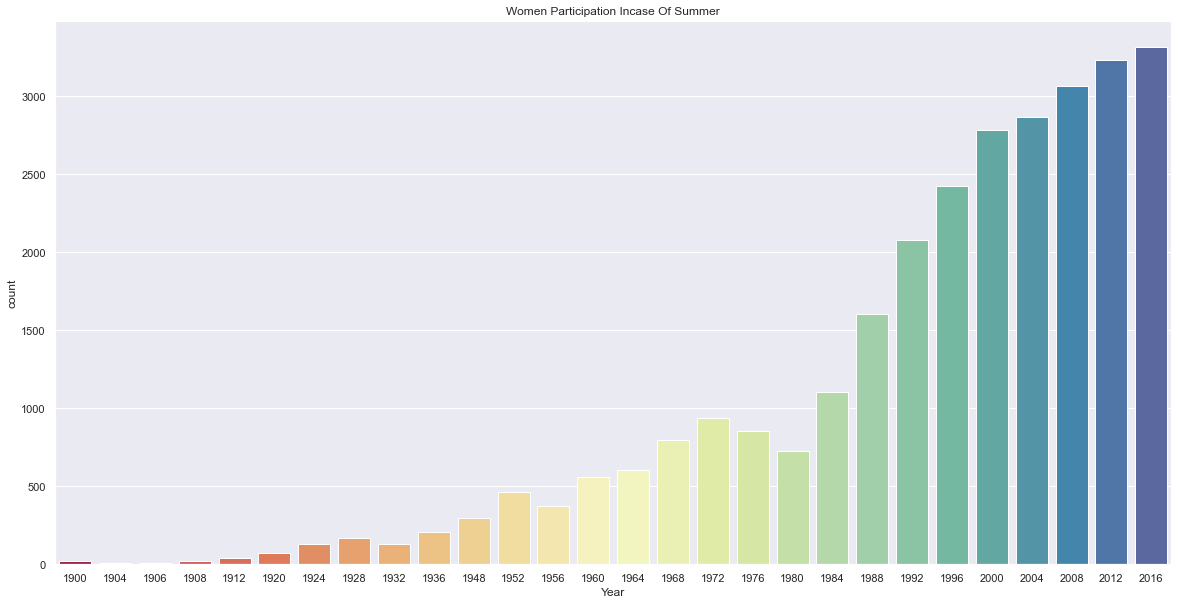

In [158]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=female_olymp,palette='Spectral')
plt.title('Women Participation Incase Of Summer')

In [159]:
female_olympWin=ath[(ath.Sex=='F') & (ath.Season=='Winter')]

Text(0.5, 1.0, 'Women Participation Incase Of Winter')

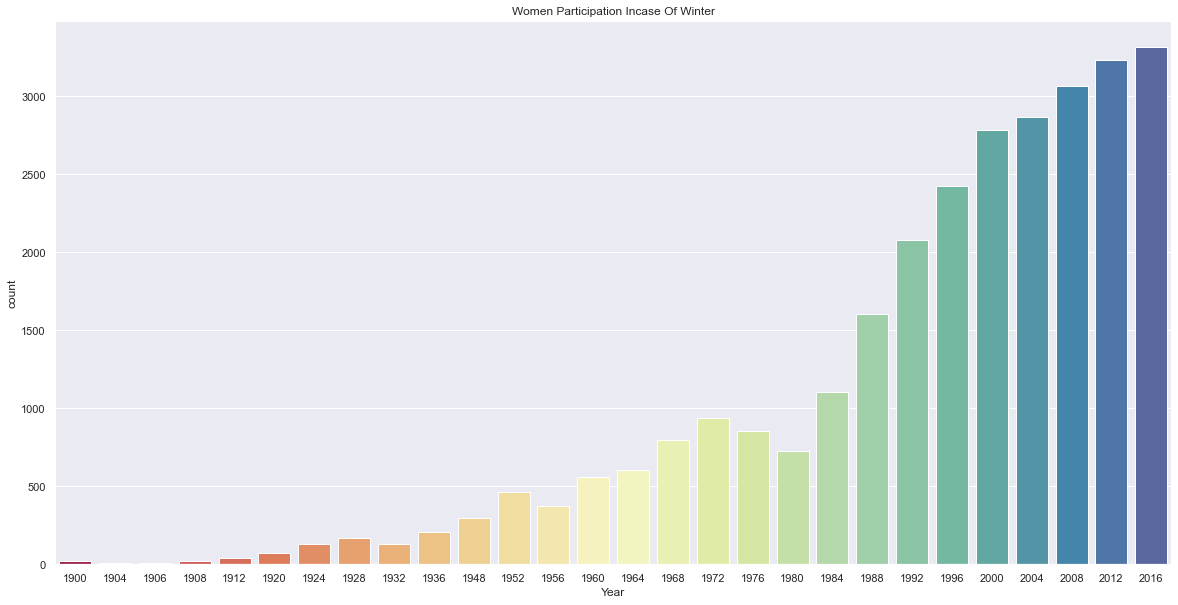

In [160]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=female_olymp,palette='Spectral')
plt.title('Women Participation Incase Of Winter')


Text(0.5, 1.0, 'Plot Of Female Athletes Over Time Incase Of Winter Season')

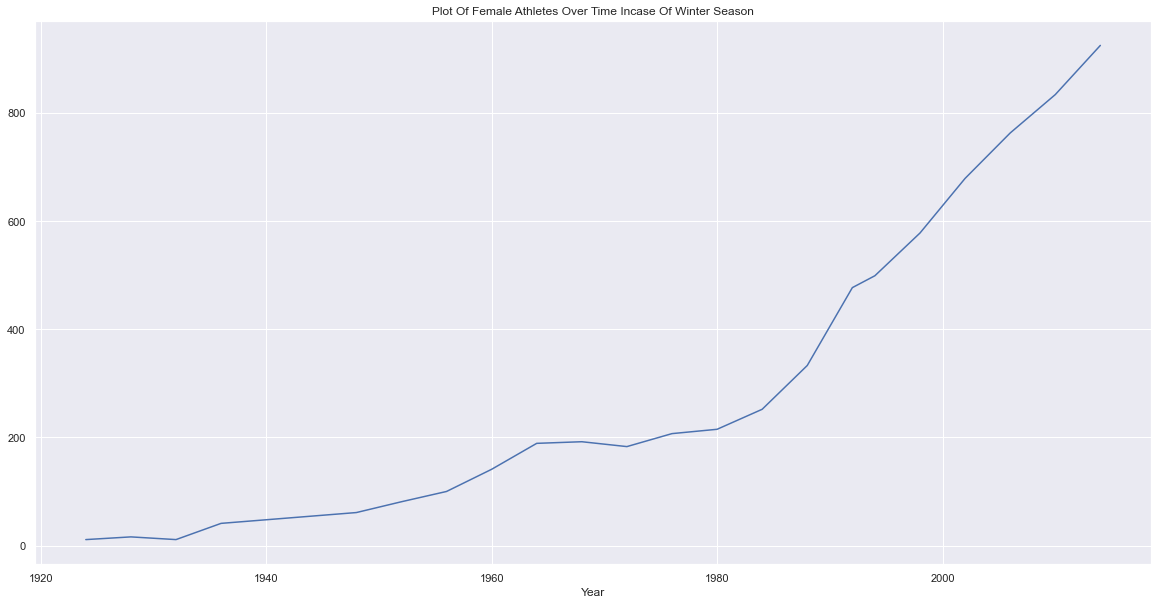

In [162]:
part=female_olympWin.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot Of Female Athletes Over Time Incase Of Winter Season')

In [163]:
#let's see the athletes whoes is more than 50
more_ath=ath['Sport'][ath['Age']>50]
more_ath

50        Art Competitions
119               Shooting
120               Shooting
633               Shooting
634               Shooting
                ...       
122659       Equestrianism
123000    Art Competitions
123339    Art Competitions
123967            Shooting
124300       Equestrianism
Name: Sport, Length: 491, dtype: object

Text(0, 0.5, 'Sports')

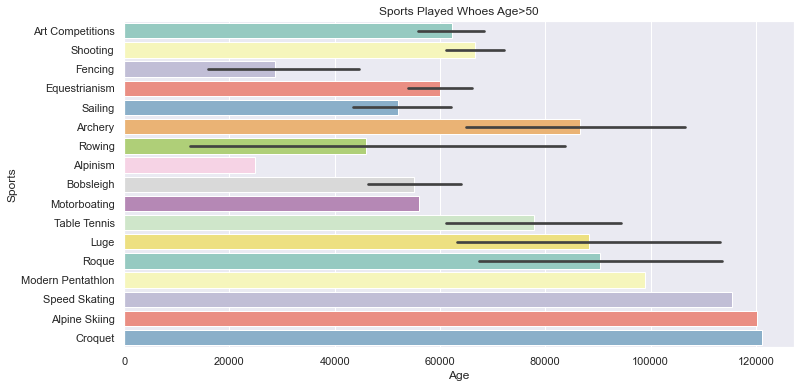

In [175]:
plt.figure(figsize=(12,6))
plt.title('Sports Played Whoes Age>50')
sns.barplot(x=more_ath.index,y=more_ath,palette='Set3')
plt.xlabel('Age')
plt.ylabel('Sports')

In [177]:
#Athletes who won Gold medal
gold_guy=ath[(ath.Medal=='Gold')]

In [181]:
gold_guy

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Region,Notes,Total Medals
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,Denmark,NaN,NaN
34,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,Finland,NaN,NaN
36,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN,Finland,NaN,NaN
40,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN,Finland,NaN,NaN
52,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN,Norway,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124579,135474,Albert Hermann Zrner,M,18.0,NaN,NaN,Germany,GER,1908 Summer,1908,Summer,London,Diving,Diving Men's Springboard,Gold,Germany,NaN,Germany,NaN,NaN
124588,135481,"Jules Alexis ""Louis"" Zutter",M,30.0,NaN,NaN,Switzerland,SUI,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Switzerland,NaN,Switzerland,NaN,NaN
124602,135501,Ellina Aleksandrovna Zvereva (Kisheyeva-),F,39.0,183.0,100.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold,Belarus,NaN,Belarus,NaN,NaN
124603,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN,Georgia,NaN,NaN


In [184]:
# Athletes over 50 years age won how may golds
gold_guy['ID'][gold_guy['Age']>50].count()

32

In [191]:
gold_sports=gold_guy['Sport'][gold_guy['Age']>50]

In [192]:
gold_sports

4527         Equestrianism
11772        Equestrianism
11774        Equestrianism
21014        Equestrianism
24889             Alpinism
45910              Sailing
53872        Equestrianism
66723     Art Competitions
67359                Roque
74732        Equestrianism
79304     Art Competitions
80376             Shooting
82440        Equestrianism
89929             Shooting
91417             Shooting
91419             Shooting
93119        Equestrianism
94212              Archery
94465     Art Competitions
95285              Sailing
106834       Equestrianism
111213       Equestrianism
113681    Art Competitions
114293            Shooting
116051    Art Competitions
118816             Archery
118817             Archery
120684    Art Competitions
121143             Croquet
121993            Shooting
121994    Art Competitions
123339    Art Competitions
Name: Sport, dtype: object

In [218]:
#Olympics

max_year=ath.Year.max()
print(max_year)

name_teams=ath[(ath.Year==max_year)&(ath.Medal=='Gold')]
name_teams.head(10)

2016


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes,Region,Notes,Total Medals
989,608,Ahmad Abughaush,M,20.0,178.0,68.0,Jordan,JOR,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Featherweight,Gold,Jordan,NaN,Jordan,NaN,NaN
1389,832,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold,UK,NaN,UK,NaN,NaN
1728,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold,USA,NaN,USA,NaN,NaN
1729,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold,USA,NaN,USA,NaN,NaN
2296,1374,Tontowi Ahmad,M,29.0,179.0,72.0,Indonesia-1,INA,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,Gold,Indonesia,NaN,Indonesia,NaN,NaN
2725,1634,Taha Akgl,M,25.0,192.0,125.0,Turkey,TUR,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Super-Heavyweight, Freestyle",Gold,Turkey,NaN,Turkey,NaN,NaN
2760,1649,Artur Kamilevich Akhmatkhuzin,M,28.0,187.0,79.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Fencing,"Fencing Men's Foil, Team",Gold,Russia,NaN,Russia,NaN,NaN
2812,1682,Morolake Akinosun,F,22.0,163.0,61.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,Gold,USA,NaN,USA,NaN,NaN
3058,1858,Fehaid Al-Deehani,M,49.0,178.0,95.0,Individual Olympic Athletes,IOA,2016 Summer,2016,Summer,Rio de Janeiro,Shooting,Shooting Men's Double Trap,Gold,Individual Olympic Athletes,Individual Olympic Athletes,Individual Olympic Athletes,Individual Olympic Athletes,NaN
3916,2497,Artur Aleksanyan,M,24.0,190.0,98.0,Armenia,ARM,2016 Summer,2016,Summer,Rio de Janeiro,Wrestling,"Wrestling Men's Heavyweight, Greco-Roman",Gold,Armenia,NaN,Armenia,NaN,NaN


# So Our Olympic Data Analysis  Finished I Hope It Was Informative and Insights Full.